In [77]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [78]:
housing=pd.read_csv("housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data preparation

In [79]:
# Binary mapping
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist]=housing[varlist].apply(lambda x:x.map({'yes':1,'no':0}))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [80]:
# Dummy variable creation
status = pd.get_dummies(housing.furnishingstatus,drop_first=True)
housing=pd.concat([housing,status],axis=1)
housing.drop('furnishingstatus',axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


## Splitting the data into test and train set

In [81]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

## Rescaling features
using min max scaler

In [82]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
num_vars=['price','area','bedrooms','bathrooms','stories','parking']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


## Dividing into X and Y sets for model building

In [83]:
y_train=df_train.pop('price')
X_train=df_train
print(y_train.head())
print(X_train.head())

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
359  0.155227       0.4        0.0  0.000000         1          0         0   
19   0.403379       0.4        0.5  0.333333         1          0         0   
159  0.115628       0.4        0.5  0.000000         1          1         1   
35   0.454417       0.4        0.5  1.000000         1          0         0   
28   0.538015       0.8        0.5  0.333333         1          0         1   

     hotwaterheating  airconditioning   parking  prefarea  semi-furnished  \
359                0                0  0.333333         0               0   
19                 0                1  0.333333         1               1   
159                0                1  0.000000         0               0   
35                 0                1  0.666667         0               0   
28                 1            

## Building model
Building model using LinearRegression

In [84]:
# importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [86]:
col=X_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [87]:
#createing X_test dataframe with only rfe selected columns
X_train_rfe=X_train[col]

In [88]:
import statsmodels.api as sm
X_train_rfe=sm.add_constant(X_train_rfe)

In [89]:
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const              0.002721
area               0.236257
bedrooms           0.066102
bathrooms          0.198169
stories            0.097722
mainroad           0.055649
guestroom          0.038136
hotwaterheating    0.089673
airconditioning    0.071079
parking            0.063739
prefarea           0.064326
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           1.28e-82
Time:                        23:34:56   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10        

In [90]:
# bedrooms is insignificant in the presence of other columns and we can drop it
X_train_rfe=X_train_rfe.drop(['bedrooms'],axis=1)

In [91]:
## Rebuilding the model without bedrooms
lm=sm.OLS(y_train,X_train_rfe).fit()
print(lm.params)
print(lm.summary())

const              0.024223
area               0.236688
bathrooms          0.207021
stories            0.109585
mainroad           0.053643
guestroom          0.038979
hotwaterheating    0.092143
airconditioning    0.071028
parking            0.066868
prefarea           0.065258
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           6.67e-83
Time:                        23:34:57   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                    

In [92]:
# calculating the vif for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
X=X_train_rfe
vif['features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF', ascending=False)
vif

,features,VIF
0,const,8.18
1,area,1.36
7,airconditioning,1.23
8,parking,1.22
2,bathrooms,1.19
3,stories,1.19
4,mainroad,1.16
9,prefarea,1.13
5,guestroom,1.08
6,hotwaterheating,1.07


## Residual analysis of train data

In [93]:
y_train_price=lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

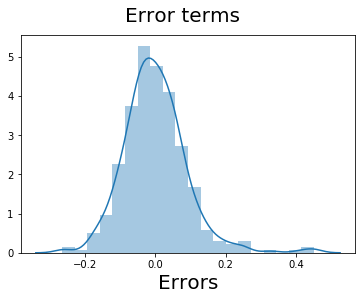

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
# plotting the histogram of error terms
fig=plt.figure()
sns.distplot([y_train-y_train_price],bins=20)
fig.suptitle('Error terms',fontsize=20)
plt.xlabel('Errors',fontsize=20)

as we can see the error are normally distributed.
## Making predictions

In [98]:
# pre-processing the test data
#scaling test data
num_vars=['price','area','bedrooms','bathrooms','stories','parking']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])

### dividing into X and Y

In [100]:
y_test=df_test.pop('price')
X_test=df_test

In [103]:
# Creating X_test_new dataframe by dropping variables from X_test
X=X_train_rfe.drop("const",axis=1)
X_test_new=X_test[X.columns]
X_test_new=sm.add_constant(X_test_new)

In [104]:
y_pred=lm.predict(X_test_new)

## Model Evaluation

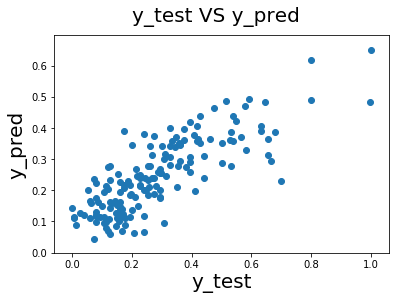

In [109]:
fig=plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle("y_test VS y_pred",fontsize=20)
plt.xlabel("y_test",fontsize=20)
plt.ylabel("y_pred",fontsize=20)
plt.show()